<a href="https://colab.research.google.com/github/elenipapadopoulou4/thesis-code/blob/main/ValenceArousal_Estimation_AffectNet_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train RESNET network on AffectNet dataset for Valence & Arousal 

Τα valence και arousal είναι συνεχείς και λαμβάνουν τιμές απο [-1,1]  <br>


valence -- > δείχνει πόσο θετικό/αρνητικό είναι το συναίσθημα που απεικονίζεται

arousal -- > δείχνει πόσο ενεργητική/παθητική είναι η συναισθηματική κατάσταση

In [ ]:
import tensorflow as tf

import os 
import matplotlib.pyplot as plt

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,GlobalAveragePooling2D,Dropout


from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint 

import matplotlib.image as mpimg

from keras.models import model_from_json
import json

from keras import backend as K

import pandas as pd

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from scipy.stats import pearsonr
from tabulate import tabulate

import statistics

import joblib

import scipy

import pickle


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!tar -xvf  '/content/gdrive/MyDrive/train_net/datasets/affectnet_new/train_set.tar' -C '/content'

Streaming output truncated to the last 5000 lines.
train_set/annotations/392066_lnd.npy
train_set/annotations/83536_lnd.npy
train_set/annotations/26361_lnd.npy
train_set/annotations/313969_aro.npy
train_set/annotations/286825_exp.npy
train_set/annotations/392215_aro.npy
train_set/annotations/330087_lnd.npy
train_set/annotations/110001_val.npy
train_set/annotations/371482_aro.npy
train_set/annotations/27940_aro.npy
train_set/annotations/35729_exp.npy
train_set/annotations/156731_aro.npy
train_set/annotations/145081_aro.npy
train_set/annotations/93043_exp.npy
train_set/annotations/279607_lnd.npy
train_set/annotations/48472_lnd.npy
train_set/annotations/206512_exp.npy
train_set/annotations/84264_aro.npy
train_set/annotations/187769_lnd.npy
train_set/annotations/300707_exp.npy
train_set/annotations/123766_exp.npy
train_set/annotations/173216_aro.npy
train_set/annotations/262096_lnd.npy
train_set/annotations/194946_aro.npy
train_set/annotations/411301_aro.npy
train_set/annotations/43103_aro

In [ ]:
!rm -r /content/train_set/annotations/

In [ ]:
!tar -xvf  '/content/gdrive/MyDrive/train_net/datasets/affectnet_new/val_set.tar' -C '/content'

Streaming output truncated to the last 5000 lines.
val_set/annotations/678_lnd.npy
val_set/annotations/1526_lnd.npy
val_set/annotations/5420_aro.npy
val_set/annotations/4628_exp.npy
val_set/annotations/5254_lnd.npy
val_set/annotations/4769_aro.npy
val_set/annotations/1994_lnd.npy
val_set/annotations/4840_lnd.npy
val_set/annotations/3546_val.npy
val_set/annotations/2606_lnd.npy
val_set/annotations/1282_val.npy
val_set/annotations/948_lnd.npy
val_set/annotations/2672_lnd.npy
val_set/annotations/1599_aro.npy
val_set/annotations/2177_exp.npy
val_set/annotations/1830_val.npy
val_set/annotations/4676_aro.npy
val_set/annotations/3228_aro.npy
val_set/annotations/5196_aro.npy
val_set/annotations/714_val.npy
val_set/annotations/2296_exp.npy
val_set/annotations/934_lnd.npy
val_set/annotations/1511_val.npy
val_set/annotations/2923_exp.npy
val_set/annotations/4198_aro.npy
val_set/annotations/886_lnd.npy
val_set/annotations/1924_exp.npy
val_set/annotations/1462_lnd.npy
val_set/annotations/812_exp.np

In [ ]:
# folder path
dir_path = "/content/train_set/images"
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    count += 1
print('File count:', count)

File count: 287651


In [ ]:
# folder path
dir_path = "/content/val_set/images"
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    count += 1
print('File count:', count)

File count: 3999


In [ ]:
dataset_train_path = '/content/train_set/images'
dataset_val_path = '/content/val_set/images'


## create dataframe

In [ ]:
#read dataframe from csv

df_train = pd.read_csv('/content/gdrive/MyDrive/train_net/datasets/affectnet/train_dataframe_final.csv') 
df_val = pd.read_csv('/content/gdrive/MyDrive/train_net/datasets/affectnet/val_dataframe_final.csv') 

df_train = df_train.drop(["expression"],axis=1)
df_val = df_val.drop(["expression"],axis=1)

In [ ]:
df_train

,face_name_align,valence,arousal,race,gender,age
0,/content/train_set/images/102819.jpg,-0.404762,0.476190,Indian,Male,30-39
1,/content/train_set/images/364716.jpg,0.754936,0.101626,White,Female,10-19
2,/content/train_set/images/50848.jpg,0.714286,-0.174603,White,Female,20-29
3,/content/train_set/images/228471.jpg,-0.425861,0.445219,Asian,Male,20-29
4,/content/train_set/images/324085.jpg,-0.029036,0.701703,White,Female,20-29
...,...,...,...,...,...,...
286589,/content/train_set/images/329316.jpg,0.285714,-0.500000,White,Male,20-29
286590,/content/train_set/images/44921.jpg,0.004839,0.004839,White,Female,20-29
286591,/content/train_set/images/21475.jpg,0.334889,0.803733,White,Female,3-9
286592,/content/train_set/images/290369.jpg,-0.125823,0.783972,White,Male,50-59


In [ ]:

df_val

,face_name_align,valence,arousal,race,gender,age
0,/content/val_set/images/5158.jpg,-0.542092,0.637755,Black,Male,20-29
1,/content/val_set/images/5166.jpg,-0.650794,0.634921,White,Female,60-69
2,/content/val_set/images/5162.jpg,-0.663717,0.674252,Indian,Male,20-29
3,/content/val_set/images/5156.jpg,-0.714286,0.484127,White,Male,30-39
4,/content/val_set/images/5157.jpg,-0.750605,0.423729,White,Male,50-59
...,...,...,...,...,...,...
3981,/content/val_set/images/374.jpg,-0.634921,0.626984,White,Female,20-29
3982,/content/val_set/images/364.jpg,-0.056073,0.901484,Black,Male,0-2
3983,/content/val_set/images/373.jpg,-0.721660,0.505689,White,Female,30-39
3984,/content/val_set/images/371.jpg,-0.591463,0.619148,White,Female,20-29


# Before Split

##Show data

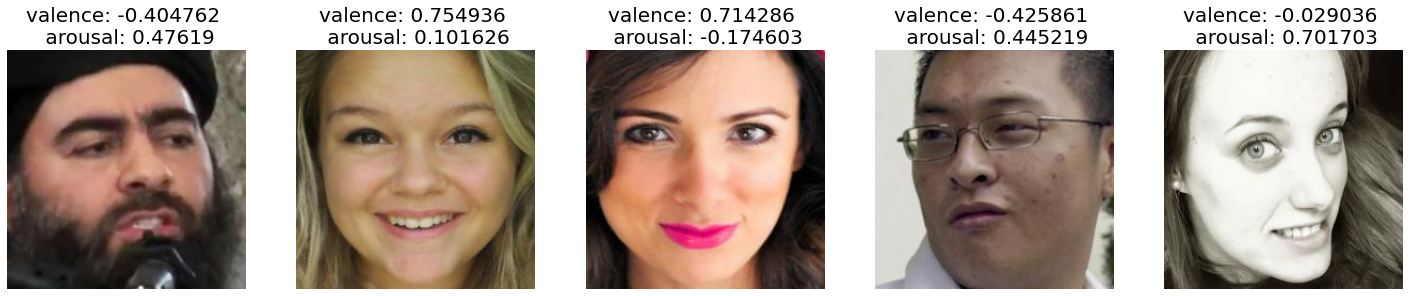

In [ ]:
num_images = 5
fig, axs = plt.subplots(figsize=(20, 4), ncols=num_images, constrained_layout=True)
for i in range(num_images):
  image  =  mpimg.imread(df_train['face_name_align'][i])
  axs[i].imshow(image)  
  axs[i].set_title('valence: {} \n arousal: {}'.format(df_train['valence'][i],df_train['arousal'][i]),fontsize = 20)
  axs[i].axis("off")

## data preprocessing 

In [ ]:
# load one image
image = Image.open(df_train['face_name_align'][30])
# convert image to numpy array
data = np.asarray(image)

In [ ]:
print(np.shape(data))

(224, 224, 3)


Οι εικόνες που στέλνουμε στο νευρωνικό δίκτυο είναι resized σε 224*224και είναι έγχρωμες (τιμές απο 0-255). <br>

  Έτσι στο δίκτυο οι πίνακες είναι μεγέθους 224 * 224 * 3. <br>Μειώνω τις διαστάσεις των εικόνων σε 112 * 112 * 3 

In [ ]:
# get batches of tensor image data (rescaled to 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
#load and iterate training dataset
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='face_name_align',
    y_col=['valence','arousal'], #multitask
    target_size=(112, 112), 
    color_mode='rgb',
    class_mode='raw', #regression
    batch_size=batch_size
)
# load and iterate validation dataset
validation_generator = test_datagen.flow_from_dataframe(
    df_val,
    x_col='face_name_align',
    y_col=['valence','arousal'],
    target_size=(112, 112), 
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size
)

Found 286594 validated image filenames.
Found 3986 validated image filenames.


## data distribution

In [ ]:
def show_v_a_distribution(df_train,df_val):
 
  sets = ['train','validation']
  fig,axs = plt.subplots(figsize =(15, 5),ncols=2)
  fig.suptitle("Database: AffectNet\nTask: valence and arousal estimation\n BEFORE split\n", fontsize = 10)
  for i,df in enumerate([df_train,df_val]):
    x = df['arousal']
    y = df['valence']
    hist = axs[i].hist2d(x, y,range =  [[-1, 1], [-1, 1]])
    axs[i].set_xlabel('arousal', fontsize=12)
    axs[i].set_ylabel('valence', fontsize=12)
    axs[i].set_title("Distribution of {} set".format(sets[i]), fontsize=12)
    fig.colorbar(hist[3], ax=axs[i])


In [ ]:
def plot_samples(category,names,train_counter,val_counter):
  fig, axs = plt.subplots(figsize=(14, 4), ncols=2, constrained_layout=True)
  fig.suptitle("Database: AffectNet\nTask: valence and arousal estimation\n BEFORE split", fontsize = 15)
  sets = ['train','validation','test']
  for i,set_counter in enumerate([train_counter,val_counter]):
    names_list = [name for name in names]
    axs[i].bar(names_list,set_counter,color='c',  edgecolor='black')
    axs[i].set_title("{} for {} set".format(category,sets[i]),fontsize=15)

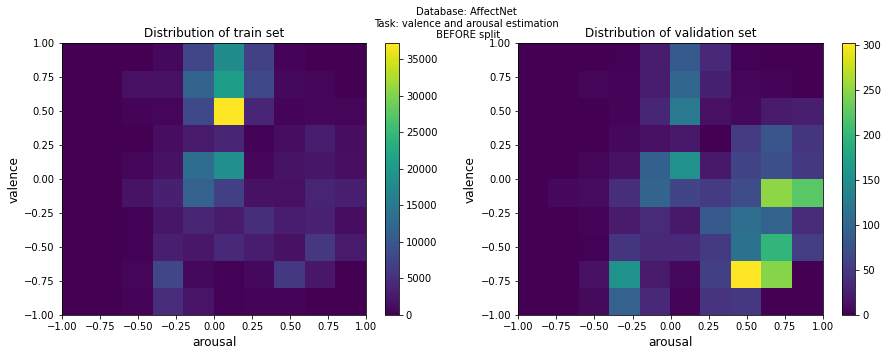

In [ ]:
show_v_a_distribution(df_train,df_val)

Απο τα παραπάνω παρατηρώ πως τα σύνολα δεδομένων αποτελούνται απο εικόνες οι οποίες έχουν τις διαφορετικές κατανομές για τις τιμές valence και arousal

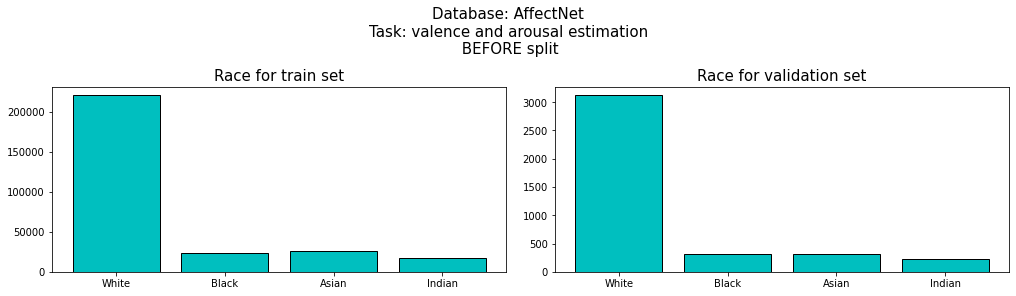

In [ ]:
race_names = ['White','Black','Asian','Indian']

race_counter_train = []
for i in range(len(race_names)):
  race_counter_train.append(len(df_train[df_train['race']==race_names[i]]))

race_counter_val = []
for i in range(len(race_names)):
  race_counter_val.append(len(df_val[df_val['race']==race_names[i]]))

plot_samples('Race',race_names,race_counter_train,race_counter_val)


In [ ]:
print(race_counter_train)
print(race_counter_val)

[220242, 23578, 25573, 17201]
[3120, 321, 311, 234]


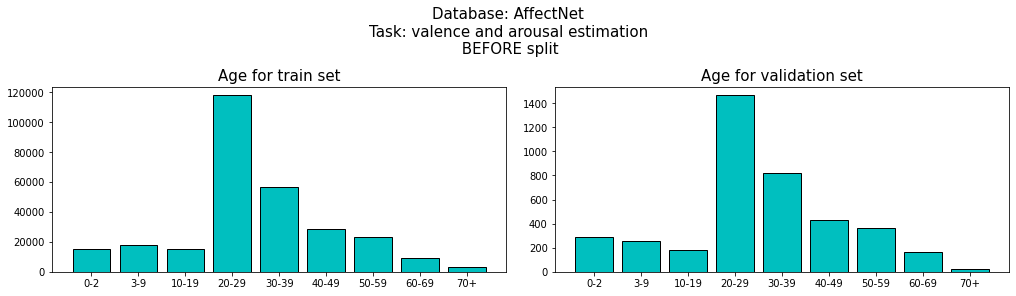

In [ ]:
age_names = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

age_counter_train = []
for i in range(len(age_names)):
  age_counter_train.append(len(df_train[df_train['age']==age_names[i]]))

age_counter_val = []
for i in range(len(age_names)):
  age_counter_val.append(len(df_val[df_val['age']==age_names[i]]))

plot_samples('Age',age_names,age_counter_train,age_counter_val)


In [ ]:
print(age_counter_train)
print(age_counter_val)

[15418, 17794, 15042, 117914, 56462, 28280, 22950, 9395, 3339]
[288, 257, 177, 1464, 821, 427, 363, 162, 27]


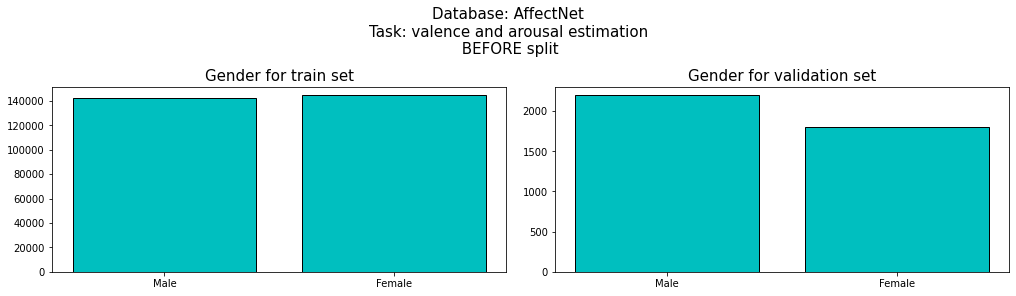

In [ ]:
gender_names = ['Male','Female']

gender_counter_train = []
for i in range(len(gender_names)):
  gender_counter_train.append(len(df_train[df_train['gender']==gender_names[i]]))

gender_counter_val = []
for i in range(len(gender_names)):
  gender_counter_val.append(len(df_val[df_val['gender']==gender_names[i]]))
plot_samples('Gender',gender_names,gender_counter_train,gender_counter_val)


In [ ]:
print(gender_counter_train)
print(gender_counter_val)

[142172, 144422]
[2192, 1794]


## training

In [ ]:
#Metric: Pearsons Correlation Coefficient
def pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum) + K.epsilon()
    r = r_num / r_den
    return K.mean(r)

In [ ]:
#pretrained model 
base_model =  tf.keras.applications.ResNet50(
    include_top=False, #custume input and output layers based on our data
    weights="imagenet", #use weights from imagenet training 
    input_shape=(112,112,3),
    pooling='avg',
)

#use functional API to allow multiple outputs
# input shape
inputs = tf.keras.Input(shape=(112, 112, 3))
# model architecture
x = base_model(inputs, training=True)
x = Dense(512, activation="relu")(x)

#output --> 2 tasks: valence & arousal
outputs = tf.keras.layers.Dense(2,activation="linear")(x) #change to tanh and see results
model = tf.keras.Model(inputs, outputs)
  

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 112, 112, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 24,584,706
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#compile model
model.compile(optimizer=Adam(learning_rate=0.001),
                     loss= 'mse')

In [ ]:
#checkpoint 
filepath = "/content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_before/AffectNet-{epoch:02d}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


#fit model
history = model.fit(train_generator,validation_data=validation_generator,epochs=10,callbacks=callbacks_list)


Epoch 1/10
8957/8957 [==============================] - ETA: 0s - loss: 0.0994
Epoch 1: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_before/AffectNet-01.h5
8957/8957 [==============================] - 1097s 120ms/step - loss: 0.0994 - val_loss: 0.1909
Epoch 2/10
8957/8957 [==============================] - ETA: 0s - loss: 0.0820
Epoch 2: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_before/AffectNet-02.h5
8957/8957 [==============================] - 1072s 120ms/step - loss: 0.0820 - val_loss: 0.1967
Epoch 3/10
8957/8957 [==============================] - ETA: 0s - loss: 0.0756
Epoch 3: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_before/AffectNet-03.h5
8957/8957 [==============================] - 1074s 120ms/step - loss: 0.0756 - val_loss: 0.1805
Epoch 4/10
8957/8957 [==============================] - ETA: 0s - l

## evaluation


In [ ]:
RACES =['White','Black','Asian','Indian']
AGES = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']
GENDERS = ['Male','Female']

In [ ]:
batch_size = 32
#create a test generator with no shuffle
test_generator = test_datagen.flow_from_dataframe(
    df_val,
    x_col='face_name_align',
    y_col=['valence','arousal'],
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='raw', #multilabel output
    batch_size=batch_size,
    shuffle = False
  )


Found 3986 validated image filenames.


In [ ]:
#new correlation coef
def concordance_cc2_eval(r1, r2): #r1,r2 = labels,predictions
     mean_cent_prod = np.mean((r1 - np.mean(r1)) * (r2 - np.mean(r2)))
     return (2 * mean_cent_prod) / (np.var(r1) + np.var(r2) + (np.mean(r1) - np.mean(r2)) ** 2)


In [ ]:
def correlation_mse_mae(labels,predictions):
  correlation = concordance_cc2_eval(labels, predictions)
  mse = mean_squared_error(labels, predictions)
  mae = mean_absolute_error(labels, predictions)
  return (correlation,mse,mae)




In [ ]:
def predictions_labels_category(test_generator,df_test,labels,predictions,category_list,category_name):
  y_pred = {key: [] for key in category_list}
  y_true = {key: [] for key in category_list}
  category_counter = {key: [] for key in category_list} # values are list of indexes of each category

  for i,name in enumerate(test_generator.filenames): 
    category_filename = df_test.loc[df_test['face_name_align'] == name, category_name].item()
    for cat in category_list:
      if category_filename == cat:
        category_counter[cat].append(i)
        y_pred[cat].append(predictions[i])
        y_true[cat].append(labels[i])
    
  return y_true,y_pred,category_counter

In [ ]:
models_labels = {}
models_predictions = {}
models_directory = '/content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_before'
for saved_model in (os.listdir(models_directory)):
  model = tf.keras.models.load_model(os.path.join(models_directory,saved_model))
  models_labels[saved_model[:-3]] = test_generator.labels
  models_predictions[saved_model[:-3]] = model.predict(test_generator)


In [ ]:
def valence_arousal(labels,predictions):
  valence_labels= []
  valence_predictions = []
  arousal_labels = []
  arousal_predictions = []

  for (v_l,a_l),(v_p,a_p) in zip(labels,predictions):
    valence_labels.append(v_l)
    valence_predictions.append(v_p)
    arousal_labels.append(a_l)
    arousal_predictions.append(a_p)

  return valence_labels,valence_predictions,arousal_labels,arousal_predictions

In [ ]:
for model_name in models_labels.keys():
  
  valence_labels= []
  valence_predictions = []
  arousal_labels = []
  arousal_predictions = []

  labels,predictions = models_labels[model_name],models_predictions[model_name]
  valence_labels,valence_predictions,arousal_labels,arousal_predictions = valence_arousal(labels,predictions)

  print("Model Name: =",model_name)
  correlation_v,mse_v,mae_v = correlation_mse_mae(valence_labels,valence_predictions)
  correlation_a,mse_a,mae_a = correlation_mse_mae(arousal_labels,arousal_predictions)
  data = [["Correlation",correlation_v,correlation_a],["Mean Squared Error",mse_v,mse_a],["Mean Absolute Error",mae_v,mae_a]]
  print(tabulate(data, headers=[" Valence","Arousal"]))
  print('\n\n')

Model Name: = AffectNet-01
                        Valence    Arousal
-------------------  ----------  ---------
Correlation            0.45111    0.291154
Mean Squared Error     0.226991   0.155267
Mean Absolute Error    0.354996   0.321026



Model Name: = AffectNet-02
                        Valence    Arousal
-------------------  ----------  ---------
Correlation            0.442169   0.323796
Mean Squared Error     0.234521   0.159163
Mean Absolute Error    0.356778   0.319915



Model Name: = AffectNet-03
                        Valence    Arousal
-------------------  ----------  ---------
Correlation            0.468173   0.350513
Mean Squared Error     0.210377   0.149999
Mean Absolute Error    0.337683   0.310104



Model Name: = AffectNet-04
                        Valence    Arousal
-------------------  ----------  ---------
Correlation            0.473687   0.36901
Mean Squared Error     0.220976   0.143402
Mean Absolute Error    0.341084   0.301157



Model Name: = AffectN

In [ ]:
best_model_name = 'AffectNet-08'
best_model = tf.keras.models.load_model(os.path.join(models_directory,"{}.h5".format(best_model_name)))


In [ ]:
y_true_race,y_pred_race,counter_race = predictions_labels_category(test_generator,df_val,
                                                      models_labels[best_model_name],models_predictions[best_model_name],
                                                      RACES,'race')

y_true_age,y_pred_age,counter_age = predictions_labels_category(test_generator,df_val,
                                                    models_labels[best_model_name],models_predictions[best_model_name],
                                                    AGES,'age')

y_true_gender,y_pred_gender,counter_gender = predictions_labels_category(test_generator,df_val,
                                                          models_labels[best_model_name],models_predictions[best_model_name],
                                                          GENDERS,'gender')


In [ ]:
#give indexes of category and out
def indexes_to_videos(df_test,counter):
  videos = df_test.video.unique()
  videos_counter = []
  for i in counter:
    video = df_test.iloc[i]['video']
    videos_counter.append(video)
  return videos_counter


In [ ]:
def results_category(split,category_list,category_name,y_true,y_pred,category_counter):
  print("{} scores {} split".format(category_name,split))
  data = []
  for i,cat in enumerate(category_list):
    if len(y_true[cat])!= 0:
      v_l,v_p,a_l,a_p = valence_arousal(y_true[cat],y_pred[cat])
      data.append([cat, 
                 len(category_counter[cat]),
                 correlation_mse_mae(v_l,v_p)[0],correlation_mse_mae(a_l,a_p)[0],
                 correlation_mse_mae(v_l,v_p)[2],correlation_mse_mae(a_l,a_p)[2]])
    else:
      data.append([cat,'Nan','Nan','Nan','Nan','Nan'])
  print(tabulate(data, headers=[category_name, 
                                "#images",
                                "Correlation\nValence",
                                "Correlation\nArousal",
                                "Mean Absolute Error\nValence",
                                "Mean Absolute Error\nArousal"]))
  print()



In [ ]:
def results_category_nomse(split,category_list,category_name,y_true,y_pred,category_counter):
  print("{} scores {} split".format(category_name,split))
  data = []
  for i,cat in enumerate(category_list):
    if len(y_true[cat])!= 0:
      v_l,v_p,a_l,a_p = valence_arousal(y_true[cat],y_pred[cat])
      data.append([cat, 
                 len(category_counter[cat]),
                 correlation_mse_mae(v_l,v_p)[0],correlation_mse_mae(a_l,a_p)[0]])
    else:
      data.append([cat,'Nan','Nan','Nan'])
  print(tabulate(data, headers=[category_name, 
                                "#images",
                                "Correlation\nValence",
                                "Correlation\nArousal"]))
  print()



In [ ]:
print("AffectNet: valence & arousal task")
print("loss: MSE")
print("data augmentation: None")
print("OVERALL scores before split")
labels,predictions = models_labels[best_model_name],models_predictions[best_model_name]
v_l,v_p,a_l,a_p = valence_arousal(labels,predictions)
data = [["Correlation",correlation_mse_mae(v_l,v_p)[0],correlation_mse_mae(a_l,a_p)[0]],
        ["Mean Absolute Error",correlation_mse_mae(v_l,v_p)[2],correlation_mse_mae(a_l,a_p)[2]]]
print(tabulate(data, headers=[" Valence","Arousal"]))
print()
results_category('before',RACES,'race',y_true_race,y_pred_race,counter_race)
results_category('before',AGES,'age',y_true_age,y_pred_age,counter_age)
results_category('before',GENDERS,'gender',y_true_gender,y_pred_gender,counter_gender)


AffectNet: valence & arousal task
loss: MSE
data augmentation: None
OVERALL scores before split
                        Valence    Arousal
-------------------  ----------  ---------
Correlation            0.553435   0.430378
Mean Absolute Error    0.306823   0.286612

race scores before split
race      #images    Correlation    Correlation    Mean Absolute Error    Mean Absolute Error
                         Valence        Arousal                Valence                Arousal
------  ---------  -------------  -------------  ---------------------  ---------------------
White        3120       0.539341       0.430962               0.312054               0.287666
Black         321       0.653287       0.476653               0.258895               0.267647
Asian         311       0.618911       0.414145               0.301187               0.281876
Indian        234       0.512532       0.361471               0.310326               0.30487

age scores before split
age      #images    Corr

In [ ]:
print("AffectNet: valence & arousal task")
print("loss: MSE")
print("data augmentation: None")
print("OVERALL scores before split")
labels,predictions = models_labels[best_model_name],models_predictions[best_model_name]
v_l,v_p,a_l,a_p = valence_arousal(labels,predictions)
data = [["Correlation",correlation_mse_mae(v_l,v_p)[0],correlation_mse_mae(a_l,a_p)[0]],
        ["Mean Absolute Error",correlation_mse_mae(v_l,v_p)[2],correlation_mse_mae(a_l,a_p)[2]]]
print(tabulate(data, headers=[" Valence","Arousal"]))
print()
results_category('before',RACES,'race',y_true_race,y_pred_race,counter_race)
results_category('before',AGES,'age',y_true_age,y_pred_age,counter_age)
results_category('before',GENDERS,'gender',y_true_gender,y_pred_gender,counter_gender)


In [ ]:
print("AffectNet: valence & arousal task")
print("loss: MSE")
print("data augmentation: None")
print("BEFORE split")
labels,predictions = models_labels[best_model_name],models_predictions[best_model_name]
v_l,v_p,a_l,a_p = valence_arousal(labels,predictions)
data = [["Correlation",correlation_mse_mae(v_l,v_p)[0],correlation_mse_mae(a_l,a_p)[0]]]
print(tabulate(data, headers=[" Valence","Arousal"]))
print()
results_category_nomse('before',RACES,'race',y_true_race,y_pred_race,counter_race)
results_category_nomse('before',AGES,'age',y_true_age,y_pred_age,counter_age)
results_category_nomse('before',GENDERS,'gender',y_true_gender,y_pred_gender,counter_gender)


AffectNet: valence & arousal task
loss: MSE
data augmentation: None
BEFORE split
                Valence    Arousal
-----------  ----------  ---------
Correlation    0.553435   0.430378

race scores before split
race      #images    Correlation    Correlation
                         Valence        Arousal
------  ---------  -------------  -------------
White        3120       0.539341       0.430962
Black         321       0.653287       0.476653
Asian         311       0.618911       0.414145
Indian        234       0.512532       0.361471

age scores before split
age      #images    Correlation    Correlation
                        Valence        Arousal
-----  ---------  -------------  -------------
0-2          288       0.718477       0.480331
3-9          257       0.742154       0.55051
10-19        177       0.501475       0.299642
20-29       1464       0.524234       0.411895
30-39        821       0.541565       0.47618
40-49        427       0.467074       0.402934
50-59 

## Visualize predictions

In [ ]:
def show_predictions(num_predictions):
  fig, axs = plt.subplots(figsize=(20, 4), ncols=num_predictions, constrained_layout=True)
  X,y = test_generator.next()
  prediction = best_model.predict(X)
  for i in range(num_predictions):
    axs[i].imshow(X[i])
    axs[i].set_title("prediction:{}\n truth:{}".format(prediction[i],y[i]) ,fontsize = 10)
    axs[i].axis("off")

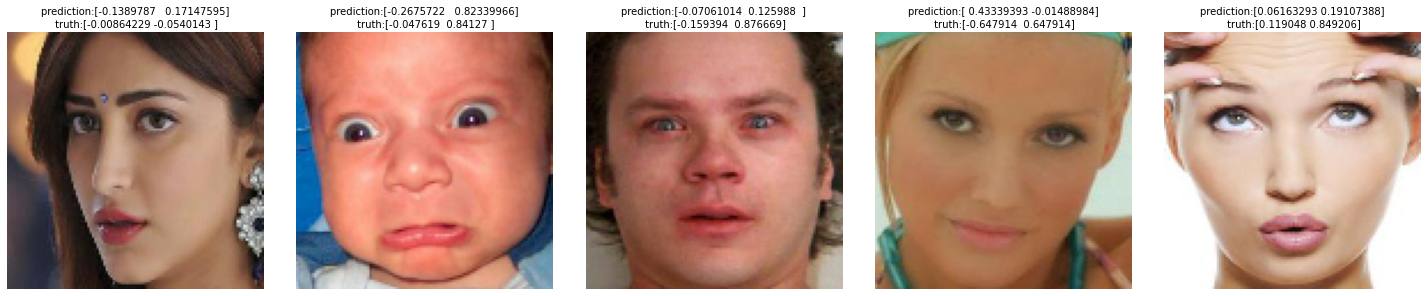

In [ ]:
show_predictions(5)

# After Split

In [ ]:
df_info = pd.concat([df_train,df_val])

In [ ]:
def train_val_test_split(category):
  len_list = len(category)
  train_per = int(len_list*0.55)
  val_per = int(len_list*0.15)
  test_per = int(len_list*0.30)
  
  train_category = list(category['face_name_align'][:train_per])
  val_category = list(category['face_name_align'][train_per:train_per+val_per])
  test_category = list(category['face_name_align'][train_per+val_per:])

  return train_category,val_category,test_category



In [ ]:
RACES =['White','Black','Asian','Indian']
AGES = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']
GENDERS = ['Male','Female']



In [ ]:
# gender-race-age split
train_new = []
validation_new = []
test_new= []

for gender in GENDERS:
  for race in RACES:
    for age in AGES:
      for v in np.arange(-1,1.2,0.2):
        for a in np.arange(-1,1.2,0.2):
          v = np.round(v,2)
          a = np.round(a,2)
          print("gender:",gender,"race:",race,"age:",age,'valence: ',np.round(v,2),'arousal: ',np.round(a,2))
          df_category = df_info[(df_info['valence']>=v) & (df_info['valence']<v+0.2) & (df_info['arousal']>=a) & (df_info['arousal']<a+0.2) & (df_info['gender']==gender) & (df_info['race']==race) & (df_info['age']==age)] 
          train_c,val_c,test_c = train_val_test_split(df_category)
          train_new.append(train_c)
          validation_new.append(val_c)
          test_new.append(test_c)   
       
    

In [ ]:
train_list = list(np.concatenate(train_new).flat)
validation_list = list(np.concatenate(validation_new).flat)
test_list= list(np.concatenate(test_new).flat)


In [ ]:
len(train_list)+len(validation_list)+len(test_list)

In [ ]:
df_train_fair = df_info[df_info['face_name_align'].isin(train_list)]
df_validation_fair = df_info[df_info['face_name_align'].isin(validation_list)]
df_test_fair = df_info[df_info['face_name_align'].isin(test_list)]

In [ ]:
#joblib.dump(df_train_fair,'/content/gdrive/MyDrive/train_net/AffectNet_VA/df_train_fair')
#joblib.dump(df_test_fair,'/content/gdrive/MyDrive/train_net/AffectNet_VA/df_test_fair')
#joblib.dump(df_validation_fair,'/content/gdrive/MyDrive/train_net/AffectNet_VA/df_validation_fair')

df_train_fair = joblib.load('/content/gdrive/MyDrive/train_net/AffectNet_VA/df_train_fair')
df_test_fair = joblib.load('/content/gdrive/MyDrive/train_net/AffectNet_VA/df_test_fair')
df_validation_fair = joblib.load('/content/gdrive/MyDrive/train_net/AffectNet_VA/df_validation_fair')


##Show data

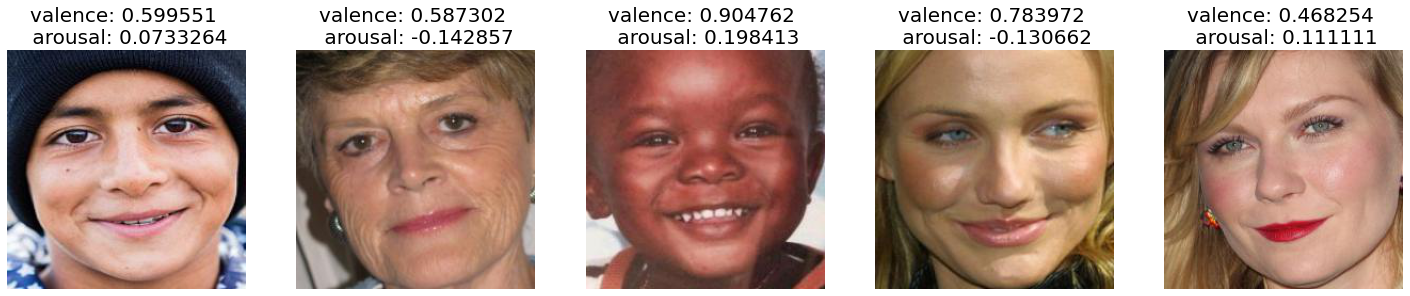

In [ ]:
num_images = 5
fig, axs = plt.subplots(figsize=(20, 4), ncols=num_images, constrained_layout=True)
for i in range(num_images):
  image  =  mpimg.imread(df_train_fair['face_name_align'][300+i])
  axs[i].imshow(image)  
  axs[i].set_title('valence: {} \n arousal: {}'.format(df_train_fair['valence'][300+i],df_train_fair['arousal'][300+i]),fontsize = 20)
  axs[i].axis("off")



## data preprocessing 

In [ ]:
# load one image
image = Image.open(df_train_fair['face_name_align'][30])
# convert image to numpy array
data = np.asarray(image)

In [ ]:
print(np.shape(data))

(224, 224, 3)


Οι εικόνες που στέλνουμε στο νευρωνικό δίκτυο είναι resized σε 224*224και είναι έγχρωμες (τιμές απο 0-255). <br>

  Έτσι στο δίκτυο οι πίνακες είναι μεγέθους 224 * 224 * 3. <br>Μειώνω τις διαστάσεις των εικόνων σε 112 * 112 * 3 

In [ ]:
# get batches of tensor image data (rescaled to 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
#load and iterate training dataset
train_generator = train_datagen.flow_from_dataframe(
    df_train_fair,
    x_col='face_name_align',
    y_col=['valence','arousal'], #multitask
    target_size=(112, 112), 
    color_mode='rgb',
    class_mode='raw', #regression
    batch_size=batch_size
)
# load and iterate validation dataset
validation_generator = test_datagen.flow_from_dataframe(
    df_validation_fair,
    x_col='face_name_align',
    y_col=['valence','arousal'],
    target_size=(112, 112), 
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size
)

# load and iterate validation dataset
test_generator = test_datagen.flow_from_dataframe(
    df_test_fair,
    x_col='face_name_align',
    y_col=['valence','arousal'],
    target_size=(112, 112), 
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle = False
)

Found 157650 validated image filenames.
Found 41633 validated image filenames.
Found 91297 validated image filenames.


In [ ]:
df_info

,face_name_align,valence,arousal,race,gender,age
0,/content/train_set/images/102819.jpg,-0.404762,0.476190,Indian,Male,30-39
1,/content/train_set/images/364716.jpg,0.754936,0.101626,White,Female,10-19
2,/content/train_set/images/50848.jpg,0.714286,-0.174603,White,Female,20-29
3,/content/train_set/images/228471.jpg,-0.425861,0.445219,Asian,Male,20-29
4,/content/train_set/images/324085.jpg,-0.029036,0.701703,White,Female,20-29
...,...,...,...,...,...,...
3981,/content/val_set/images/374.jpg,-0.634921,0.626984,White,Female,20-29
3982,/content/val_set/images/364.jpg,-0.056073,0.901484,Black,Male,0-2
3983,/content/val_set/images/373.jpg,-0.721660,0.505689,White,Female,30-39
3984,/content/val_set/images/371.jpg,-0.591463,0.619148,White,Female,20-29


## data distribution

In [ ]:
def show_v_a_distribution(df_train,df_val,df_test):
 
  sets = ['train','validation','test']
  fig,axs = plt.subplots(figsize =(20, 5),ncols=3)
  fig.suptitle(" AFTER split", fontsize = 8)
  for i,df in enumerate([df_train,df_val,df_test]):
    x = df['arousal']
    y = df['valence']
    hist = axs[i].hist2d(x, y,range =  [[-1, 1], [-1, 1]])
    axs[i].set_xlabel('arousal', fontsize=12)
    axs[i].set_ylabel('valence', fontsize=12)
    axs[i].set_title("Distribution of {} set".format(sets[i]), fontsize=12)
    fig.colorbar(hist[3], ax=axs[i])


In [ ]:
def plot_samples(category,names,train_counter,val_counter,test_counter):
  fig, axs = plt.subplots(figsize=(14, 4), ncols=3, constrained_layout=True)
  fig.suptitle("Database: AffectNet\nTask: valence and arousal estimation\n AFTER split", fontsize = 15)
  sets = ['train','validation','test']
  for i,set_counter in enumerate([train_counter,val_counter,test_counter]):
    names_list = [name for name in names]
    axs[i].bar(names_list,set_counter,color='c',  edgecolor='black')
    axs[i].set_title("{} for {} set".format(category,sets[i]),fontsize=15)

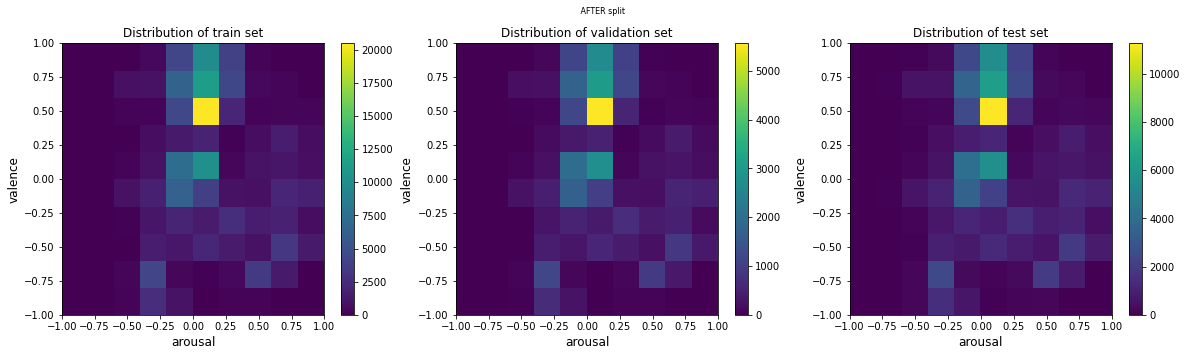

In [ ]:
show_v_a_distribution(df_train_fair,df_validation_fair,df_test_fair)

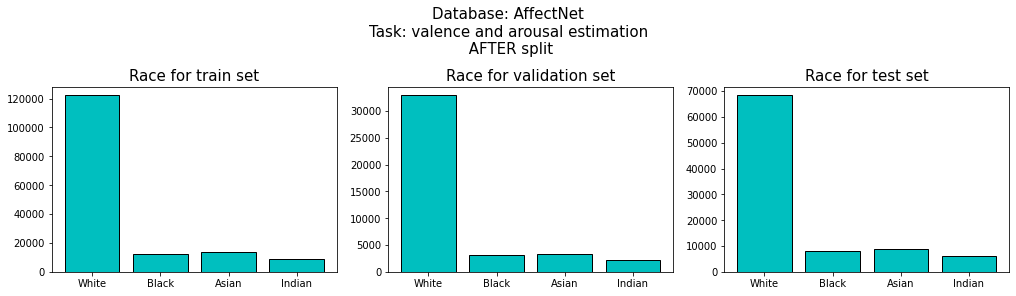

In [ ]:
race_names = ['White','Black','Asian','Indian']

race_counter_train = []
for i in range(len(race_names)):
  race_counter_train.append(len(df_train_fair[df_train_fair['race']==race_names[i]]))

race_counter_val = []
for i in range(len(race_names)):
  race_counter_val.append(len(df_validation_fair[df_validation_fair['race']==race_names[i]]))

race_counter_test = []
for i in range(len(race_names)):
  race_counter_test.append(len(df_test_fair[df_test_fair['race']==race_names[i]]))

plot_samples('Race',race_names,race_counter_train,race_counter_val,race_counter_test)


In [ ]:
print(race_counter_train)
print(race_counter_val)
print(race_counter_test)

[122180, 12649, 13704, 9117]
[32881, 3152, 3387, 2213]
[68301, 8098, 8793, 6105]


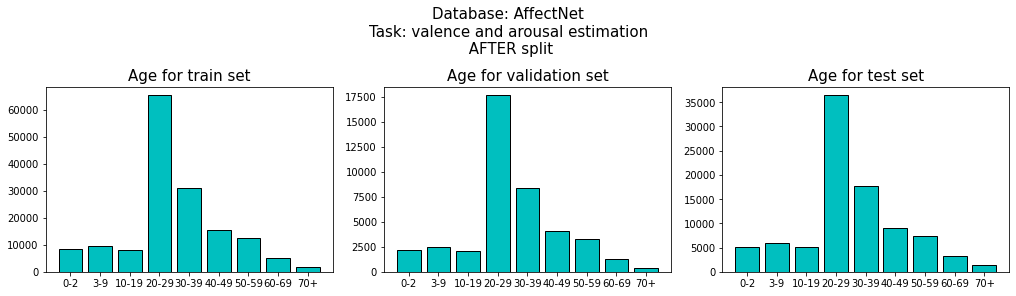

In [ ]:
age_names = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

age_counter_train = []
for i in range(len(age_names)):
  age_counter_train.append(len(df_train_fair[df_train_fair['age']==age_names[i]]))

age_counter_val = []
for i in range(len(age_names)):
  age_counter_val.append(len(df_validation_fair[df_validation_fair['age']==age_names[i]]))

age_counter_test = []
for i in range(len(age_names)):
  age_counter_test.append(len(df_test_fair[df_test_fair['age']==age_names[i]]))

plot_samples('Age',age_names,age_counter_train,age_counter_val,age_counter_test)


In [ ]:
print(age_counter_train)
print(age_counter_val)
print(age_counter_test)

[8428, 9680, 8114, 65351, 31224, 15535, 12587, 5046, 1685]
[2162, 2466, 2056, 17623, 8327, 4075, 3285, 1268, 371]
[5116, 5905, 5049, 36404, 17732, 9097, 7441, 3243, 1310]


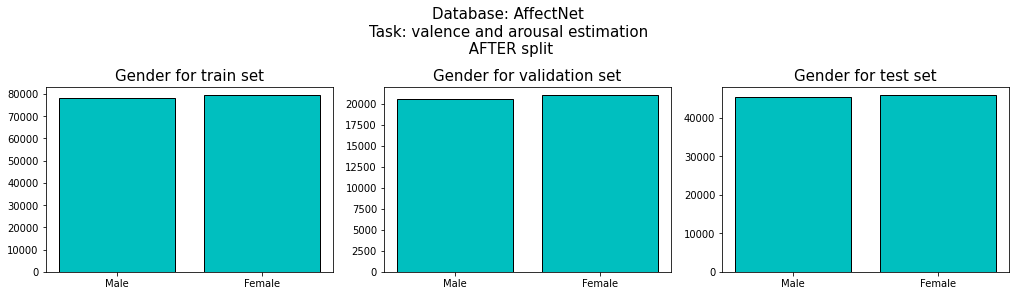

In [ ]:
gender_names = ['Male','Female']

gender_counter_train = []
for i in range(len(gender_names)):
  gender_counter_train.append(len(df_train_fair[df_train_fair['gender']==gender_names[i]]))

gender_counter_val = []
gender_names =  ['Male','Female']
for i in range(len(gender_names)):
  gender_counter_val.append(len(df_validation_fair[df_validation_fair['gender']==gender_names[i]]))

gender_counter_test = []
gender_names =  ['Male','Female']
for i in range(len(gender_names)):
  gender_counter_test.append(len(df_test_fair[df_test_fair['gender']==gender_names[i]]))

plot_samples('Gender',gender_names,gender_counter_train,gender_counter_val,gender_counter_test)


In [ ]:
print(gender_counter_train)
print(gender_counter_val)
print(gender_counter_test)

[78285, 79365]
[20618, 21015]
[45461, 45836]


## training

In [ ]:
#pretrained model 
base_model =  tf.keras.applications.ResNet50(
    include_top=False, #custume input and output layers based on our data
    weights="imagenet", #use weights from imagenet training 
    input_shape=(112,112,3),
    pooling='avg',
)

#use functional API to allow multiple outputs
# input shape
inputs = tf.keras.Input(shape=(112, 112, 3))
# model architecture
x = base_model(inputs, training=True)
x = Dense(512, activation="relu")(x)
#x = Dropout(0.2)(x)
#x = Dense(512,activation= "relu")(x)
#output --> 2 tasks: valence & arousal
outputs = tf.keras.layers.Dense(2,activation="linear")(x) #change to tanh and see results
model = tf.keras.Model(inputs, outputs)
  

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 112, 112, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dense_9 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 24,584,706
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#compile model
model.compile(optimizer=Adam(learning_rate=0.001),loss= 'mse')

In [ ]:
#checkpoint 
filepath = "/content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_after/AffectNet-{epoch:02d}.h5"
checkpoint = ModelCheckpoint(  
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch")

callbacks_list = [checkpoint]


#fit model
history = model.fit(train_generator,validation_data=validation_generator,epochs=10,callbacks=callbacks_list)


Epoch 1/10
4927/4927 [==============================] - ETA: 0s - loss: 0.1088
Epoch 1: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_after/AffectNet-01.h5
4927/4927 [==============================] - 666s 134ms/step - loss: 0.1088 - val_loss: 0.0883
Epoch 2/10
4927/4927 [==============================] - ETA: 0s - loss: 0.0854
Epoch 2: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_after/AffectNet-02.h5
4927/4927 [==============================] - 653s 132ms/step - loss: 0.0854 - val_loss: 0.0846
Epoch 3/10
4927/4927 [==============================] - ETA: 0s - loss: 0.0809
Epoch 3: saving model to /content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_after/AffectNet-03.h5
4927/4927 [==============================] - 650s 132ms/step - loss: 0.0809 - val_loss: 0.0803
Epoch 4/10
4927/4927 [==============================] - ETA: 0s - loss: 0

## evaluation


In [ ]:
models_labels_fair = {}
models_predictions_fair = {}
models_directory = '/content/gdrive/MyDrive/train_net/ckp_models/AffectNetVA/AffectNetVA_no_mse/AffectNetVA_after'
for saved_model in (os.listdir(models_directory)):
  model = tf.keras.models.load_model(os.path.join(models_directory,saved_model))
  models_labels_fair[saved_model[:-3]] = test_generator.labels
  models_predictions_fair[saved_model[:-3]] = model.predict(test_generator)


In [ ]:
for model_name in models_labels_fair.keys():
  
  valence_labels= []
  valence_predictions = []
  arousal_labels = []
  arousal_predictions = []

  labels,predictions = models_labels_fair[model_name],models_predictions_fair[model_name]
  for (v_l,a_l),(v_p,a_p) in zip(labels,predictions):
    valence_labels.append(v_l)
    valence_predictions.append(v_p)
    arousal_labels.append(a_l)
    arousal_predictions.append(a_p)

  print("Model Name: =",model_name)
  correlation_v,mse_v,mae_v = correlation_mse_mae(valence_labels,valence_predictions)
  correlation_a,mse_a,mae_a = correlation_mse_mae(arousal_labels,arousal_predictions)
  data = [["Pearsons Correlation",correlation_v,correlation_a],["Mean Squared Error",mse_v,mse_a],["Mean Absolute Error",mae_v,mae_a]]
  print(tabulate(data, headers=[" Valence","Arousal"]))
  print('\n\n')

Model Name: = AffectNet-01
                         Valence    Arousal
--------------------  ----------  ---------
Pearsons Correlation    0.738748  0.393745
Mean Squared Error      0.118935  0.0750538
Mean Absolute Error     0.250334  0.198243



Model Name: = AffectNet-02
                         Valence    Arousal
--------------------  ----------  ---------
Pearsons Correlation    0.748223  0.369667
Mean Squared Error      0.108259  0.0739683
Mean Absolute Error     0.249361  0.196187



Model Name: = AffectNet-03
                         Valence    Arousal
--------------------  ----------  ---------
Pearsons Correlation    0.771932  0.426867
Mean Squared Error      0.102982  0.0703673
Mean Absolute Error     0.239348  0.188911



Model Name: = AffectNet-04
                         Valence    Arousal
--------------------  ----------  ---------
Pearsons Correlation    0.768979  0.458726
Mean Squared Error      0.101884  0.0672099
Mean Absolute Error     0.236352  0.185245



Model Na

In [ ]:
best_model_name = 'AffectNet-10'
best_model = tf.keras.models.load_model(os.path.join(models_directory,"{}.h5".format(best_model_name)))


In [ ]:
'''
joblib.dump(models_labels_fair,'/content/gdrive/MyDrive/train_net/AffectNet_VA/models_labels_fair')
joblib.dump(models_predictions_fair,'/content/gdrive/MyDrive/train_net/AffectNet_VA/models_predictions_fair')


#models_labels_fair = joblib.load('/content/gdrive/MyDrive/train_net/AffectNet_VA/models_labels_fair')
#models_predictions_fair = joblib.load('/content/gdrive/MyDrive/train_net/AffectNet_VA/models_predictions_fair')
'''

['/content/gdrive/MyDrive/train_net/AffectNet_VA/models_predictions_fair']

In [ ]:
y_true_race,y_pred_race,counter_race = predictions_labels_category(test_generator,df_test_fair,
                                                      models_labels_fair[best_model_name],models_predictions_fair[best_model_name],
                                                      RACES,'race')

y_true_age,y_pred_age,counter_age = predictions_labels_category(test_generator,df_test_fair,
                                                    models_labels_fair[best_model_name],models_predictions_fair[best_model_name],
                                                    AGES,'age')

y_true_gender,y_pred_gender,counter_gender = predictions_labels_category(test_generator,df_test_fair,
                                                          models_labels_fair[best_model_name],models_predictions_fair[best_model_name],
                                                          GENDERS,'gender')


In [ ]:
print("OVERALL scores after split")
labels,predictions = models_labels_fair[best_model_name],models_predictions_fair[best_model_name]
v_l,v_p,a_l,a_p = valence_arousal(labels,predictions)
data = [["Pearsons Correlation",correlation_mse_mae(v_l,v_p)[0],correlation_mse_mae(a_l,a_p)[0]],
        ["Mean Absolute Error",correlation_mse_mae(v_l,v_p)[2],correlation_mse_mae(a_l,a_p)[2]]]
print(tabulate(data, headers=[" Valence","Arousal"]))
print()
results_category('after',RACES,'race',y_true_race,y_pred_race,counter_race)
results_category('after',AGES,'age',y_true_age,y_pred_age,counter_age)
results_category('after',GENDERS,'gender',y_true_gender,y_pred_gender,counter_gender)


OVERALL scores after split
                         Valence    Arousal
--------------------  ----------  ---------
Pearsons Correlation    0.79315    0.514129
Mean Absolute Error     0.228909   0.180403

race scores after split
race      #images    Correlation    Correlation    Mean Absolute Error    Mean Absolute Error
                         Valence        Arousal                Valence                Arousal
------  ---------  -------------  -------------  ---------------------  ---------------------
White       68301       0.792355       0.523685               0.227755               0.177304
Black        8098       0.806286       0.506471               0.228238               0.184201
Asian        8793       0.788555       0.466171               0.232806               0.189561
Indian       6105       0.783306       0.476927               0.237101               0.196851

age scores after split
age      #images    Correlation    Correlation    Mean Absolute Error    Mean Absolute Err

In [ ]:
print("AffectNet: valence & arousal task")
print("loss: MSE")
print("data augmentation: None")
print("AFTER split")
labels,predictions = models_labels_fair[best_model_name],models_predictions_fair[best_model_name]
v_l,v_p,a_l,a_p = valence_arousal(labels,predictions)
data = [["Pearsons Correlation",correlation_mse_mae(v_l,v_p)[0],correlation_mse_mae(a_l,a_p)[0]],
        ["Mean Absolute Error",correlation_mse_mae(v_l,v_p)[2],correlation_mse_mae(a_l,a_p)[2]]]
print(tabulate(data, headers=[" Valence","Arousal"]))
print()
results_category_nomse('after',RACES,'race',y_true_race,y_pred_race,counter_race)
results_category_nomse('after',AGES,'age',y_true_age,y_pred_age,counter_age)
results_category_nomse('after',GENDERS,'gender',y_true_gender,y_pred_gender,counter_gender)


AffectNet: valence & arousal task
loss: MSE
data augmentation: None
AFTER split
                         Valence    Arousal
--------------------  ----------  ---------
Pearsons Correlation    0.79315    0.514129
Mean Absolute Error     0.228909   0.180403

race scores after split
race      #images    Correlation    Correlation
                         Valence        Arousal
------  ---------  -------------  -------------
White       68301       0.792355       0.523685
Black        8098       0.806286       0.506471
Asian        8793       0.788555       0.466171
Indian       6105       0.783306       0.476927

age scores after split
age      #images    Correlation    Correlation
                        Valence        Arousal
-----  ---------  -------------  -------------
0-2         5116       0.848919       0.57567
3-9         5905       0.843354       0.578584
10-19       5049       0.795325       0.459499
20-29      36404       0.777425       0.502931
30-39      17732       0.800131

# Results

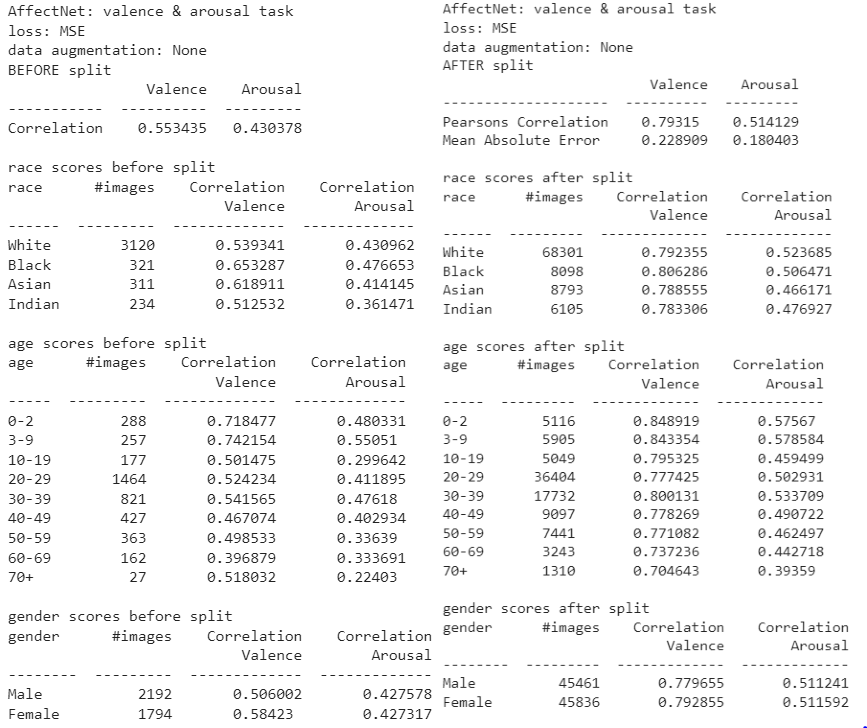